In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [135]:
df = pd.read_csv('booking.csv')
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [137]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [138]:
df.shape

(36285, 17)

In [139]:
null_count = df.isnull().sum()
print(null_count)

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [140]:
not_null = df.notnull().sum()
print(not_null)

Booking_ID                  36285
number of adults            36285
number of children          36285
number of weekend nights    36285
number of week nights       36285
type of meal                36285
car parking space           36285
room type                   36285
lead time                   36285
market segment type         36285
repeated                    36285
P-C                         36285
P-not-C                     36285
average price               36285
special requests            36285
date of reservation         36285
booking status              36285
dtype: int64


In [141]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [142]:
x = df[['lead time', 'number of adults', 'number of children', 'type of meal', 'market segment type']]
y = df['booking status']

In [143]:
x.head()

,lead time,number of adults,number of children,type of meal,market segment type
0,224,1,1,Meal Plan 1,Offline
1,5,1,0,Not Selected,Online
2,1,2,1,Meal Plan 1,Online
3,211,1,0,Meal Plan 1,Online
4,48,1,0,Not Selected,Online


In [144]:
y.head()

,booking status
0,Not_Canceled
1,Not_Canceled
2,Canceled
3,Canceled
4,Canceled


In [145]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(x[['type of meal', 'market segment type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['type of meal', 'market segment type']))


In [146]:
x = x.drop(['type of meal', 'market segment type'], axis=1)
x = pd.concat([x, encoded_df], axis=1)

In [147]:
count = df["booking status"].value_counts()
count

,count
booking status,
Not_Canceled,24396
Canceled,11889


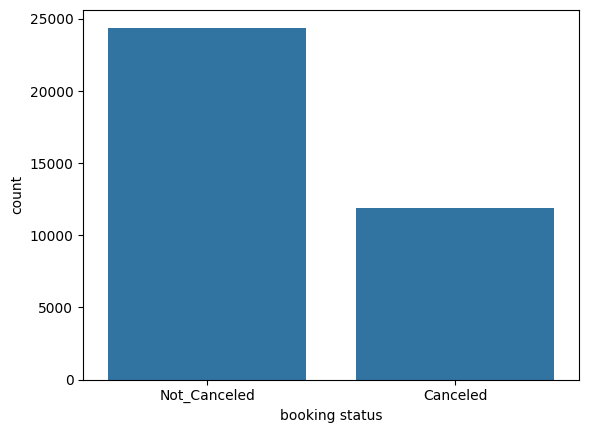

In [148]:
graph = sns.countplot(x="booking status", data=df)
plt.show()

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

In [150]:
scaled = StandardScaler()
x_train_scaled = scaled.fit_transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [151]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [152]:
y_pred = model.predict(x_test_scaled)

In [153]:
print("Accuracy Score", accuracy_score(y_test, y_pred))

Accuracy Score 0.754547124747382


In [154]:
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

    Canceled       0.70      0.44      0.54      3567
Not_Canceled       0.77      0.91      0.83      7319

    accuracy                           0.75     10886
   macro avg       0.73      0.67      0.69     10886
weighted avg       0.75      0.75      0.74     10886



In [155]:
print("Confusion Matrix", confusion_matrix(y_test, y_pred))

Confusion Matrix [[1584 1983]
 [ 689 6630]]


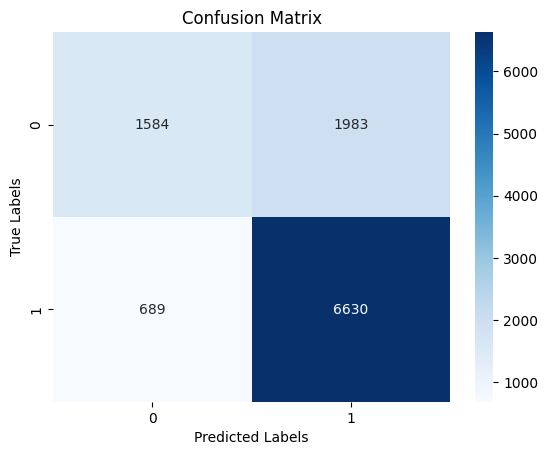

In [156]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = 'd', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()